#  Projet Python data visualisation  

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Dataset des résultats de courses de F1 de 1950 à 2021

In [171]:
df = pd.read_csv('../Python/data/F1_results.csv') 
df

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24975,24981,1052,854,210,47,18,16,16,16,0.0,55,\N,\N,38,18,1:36.134,202.667,11
24976,24982,1052,842,213,10,5,17,17,17,0.0,52,\N,\N,48,5,1:34.090,207.069,31
24977,24983,1052,849,3,6,17,18,18,18,0.0,51,\N,\N,16,19,1:36.602,201.685,31
24978,24984,1052,4,214,14,9,\N,R,19,0.0,32,\N,\N,31,17,1:36.063,202.816,23


In [172]:
df.drop(['resultId', 'statusId'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24980 entries, 0 to 24979
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   raceId           24980 non-null  int64  
 1   driverId         24980 non-null  int64  
 2   constructorId    24980 non-null  int64  
 3   number           24980 non-null  object 
 4   grid             24980 non-null  int64  
 5   position         24980 non-null  object 
 6   positionText     24980 non-null  object 
 7   positionOrder    24980 non-null  int64  
 8   points           24980 non-null  float64
 9   laps             24980 non-null  int64  
 10  time             24980 non-null  object 
 11  milliseconds     24980 non-null  object 
 12  fastestLap       24980 non-null  object 
 13  rank             24980 non-null  object 
 14  fastestLapTime   24980 non-null  object 
 15  fastestLapSpeed  24980 non-null  object 
dtypes: float64(1), int64(6), object(9)
memory usage: 3.0+ MB


## Contexte:
##### Le Championnat du Monde de Formule 1 de la FIA est l'une des premières formes de course dans le monde depuis sa saison inaugurale en 1950. Une saison de Formule 1 consiste en une série de courses, appelées Grands Prix. Durant ces courses des écurie (constructeur) composé de deux pilotes chacunes s'affronte en effectuant un certains nombres de tours sur des circuits dans le monde entier.

##### Ce dataset contient les données des résulats de tous les courses de F1 de l'année 1950 à 2021 :

raceId: Identifiant de la course

driverId: Identifiant du pilote

constructorId : Identifiant du constructeur

number: Numéro de la voiture

grid: Position du pilote sur la ligne de départ

position: Position du pilote à l'arriver

positionOrder: Position du pilote au championnat

points: Nombre de points remporté

laps: Nombre de tours éffectué

time: Temps total de course

milliseconds: Temps total en milisecondes

fastestLap: Tour auquel le pilote à été le plus rapide

rank: Position par rapport au temps le rappide sur un tour

fastestLapTime: Temps le plus rapide sur un tour

fastestLapSpeed: vitesse la plus rapide sur un tour

### Les analyses suivantes concernent que les données de la course 18

In [173]:
df.drop( df[ df['raceId'] != 18 ].index, inplace=True)
df

,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed
0,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300
1,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586
2,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719
3,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464
4,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385
5,18,6,3,8,13,6,6,6,3.0,57,\N,\N,50,14,1:29.639,212.974
6,18,7,5,14,17,7,7,7,2.0,55,\N,\N,22,12,1:29.534,213.224
7,18,8,6,1,15,8,8,8,1.0,53,\N,\N,20,4,1:27.903,217.180
8,18,9,2,4,2,\N,R,9,0.0,47,\N,\N,15,9,1:28.753,215.100
9,18,10,7,12,18,\N,R,10,0.0,43,\N,\N,23,13,1:29.558,213.166


##### Analyse de l'évolution de la vitesse des F1 au fil des tours

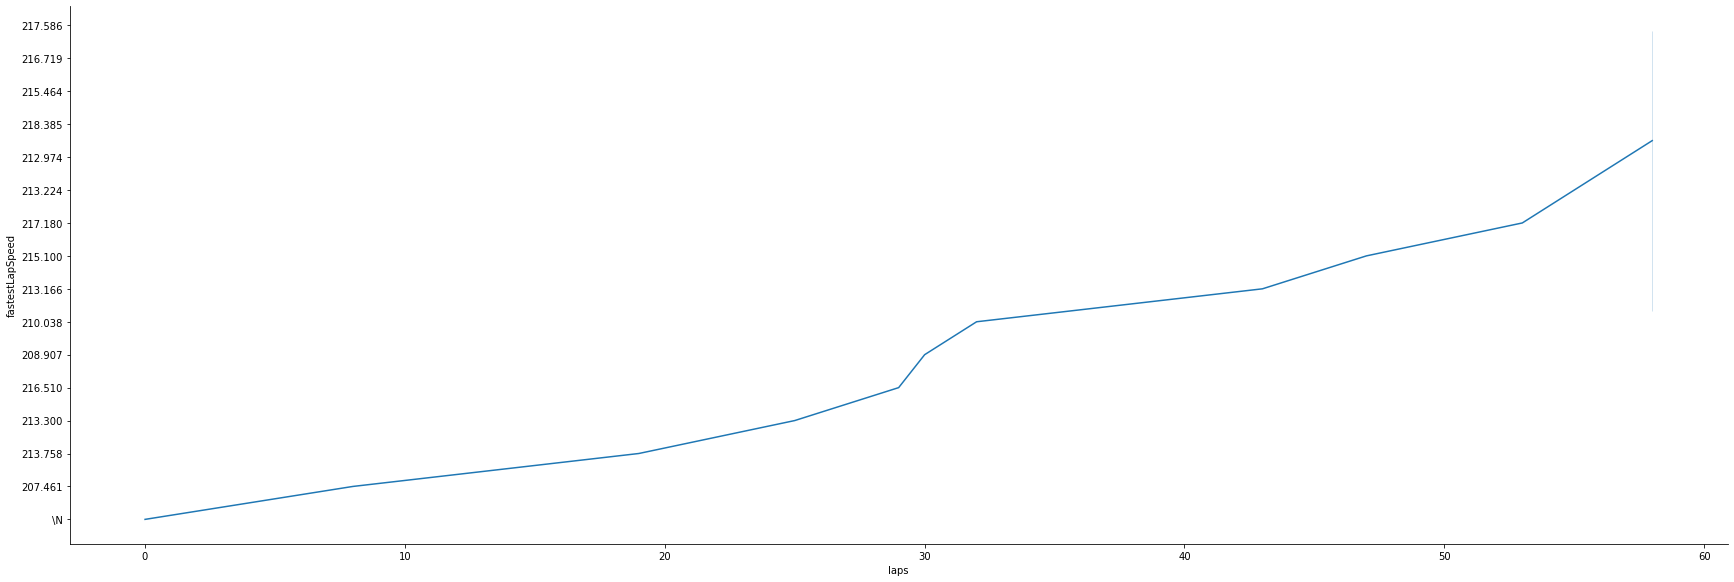

In [174]:
sns.relplot(data=df, x="laps", y="fastestLapSpeed", kind="line", height=8, aspect=3)

##### Analyse de l'évolution du temps au tour par rapport à la vitesse au tour 

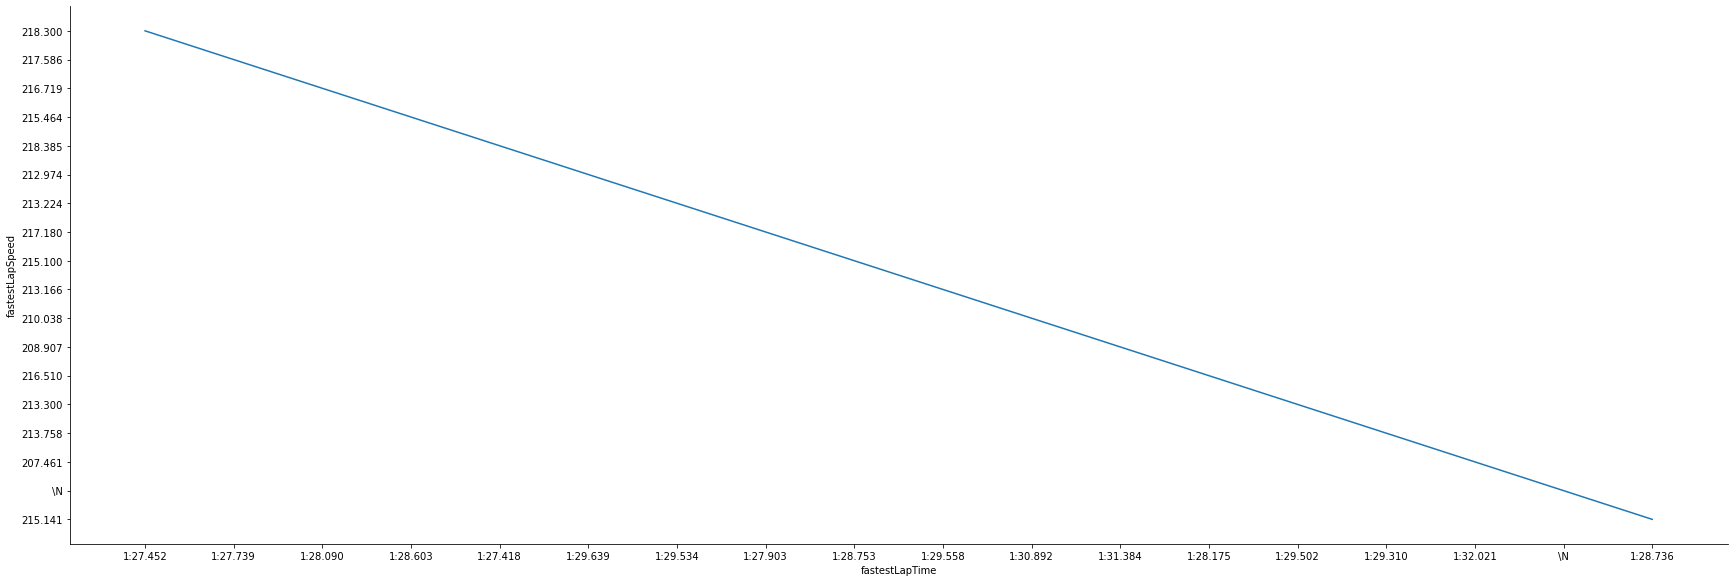

In [175]:
sns.relplot(data=df, x="fastestLapTime", y="fastestLapSpeed", kind="line", height=8, aspect=3)

#### Analyse de l'évolution des positions d'arriver par rapport aux positions de départ

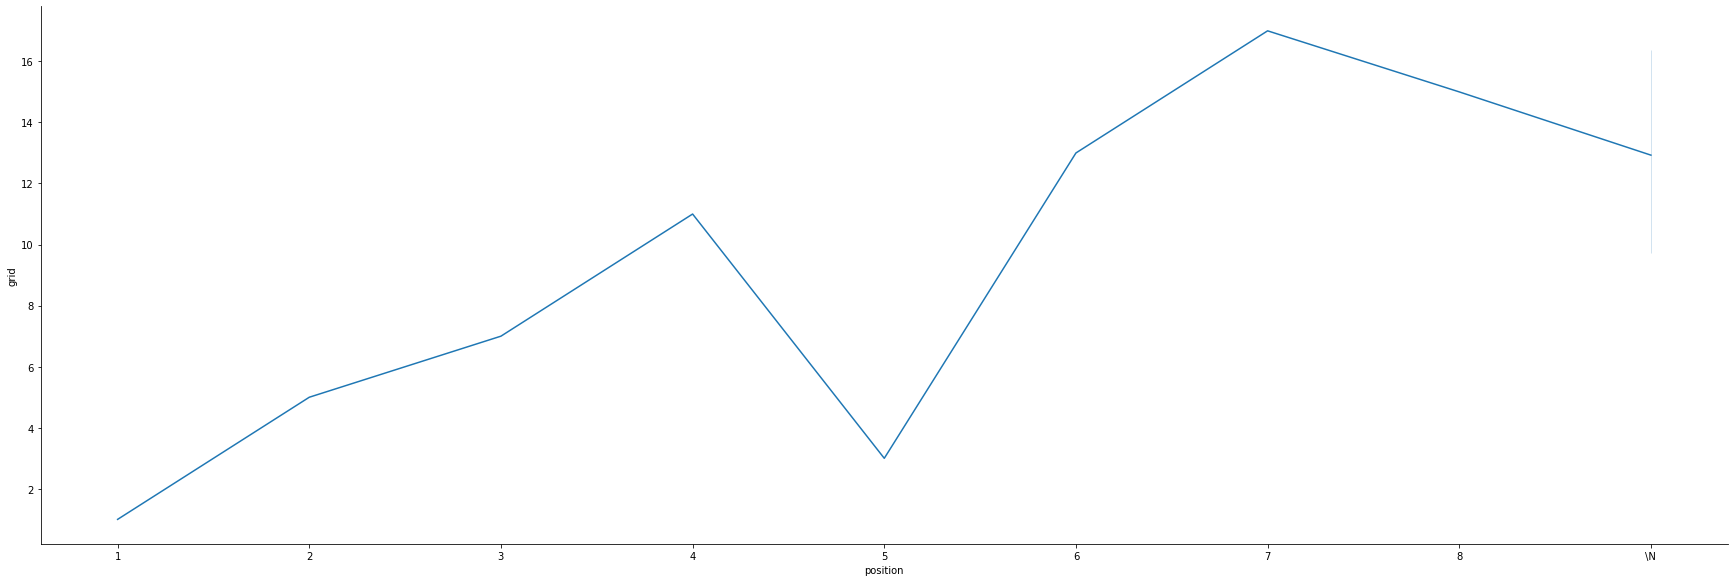

In [176]:
sns.relplot(data=df, x="position", y="grid", kind='line', height=8, aspect=3, )

In [177]:
#

#### Analyse de l'écart temps de course total entres les pilotes

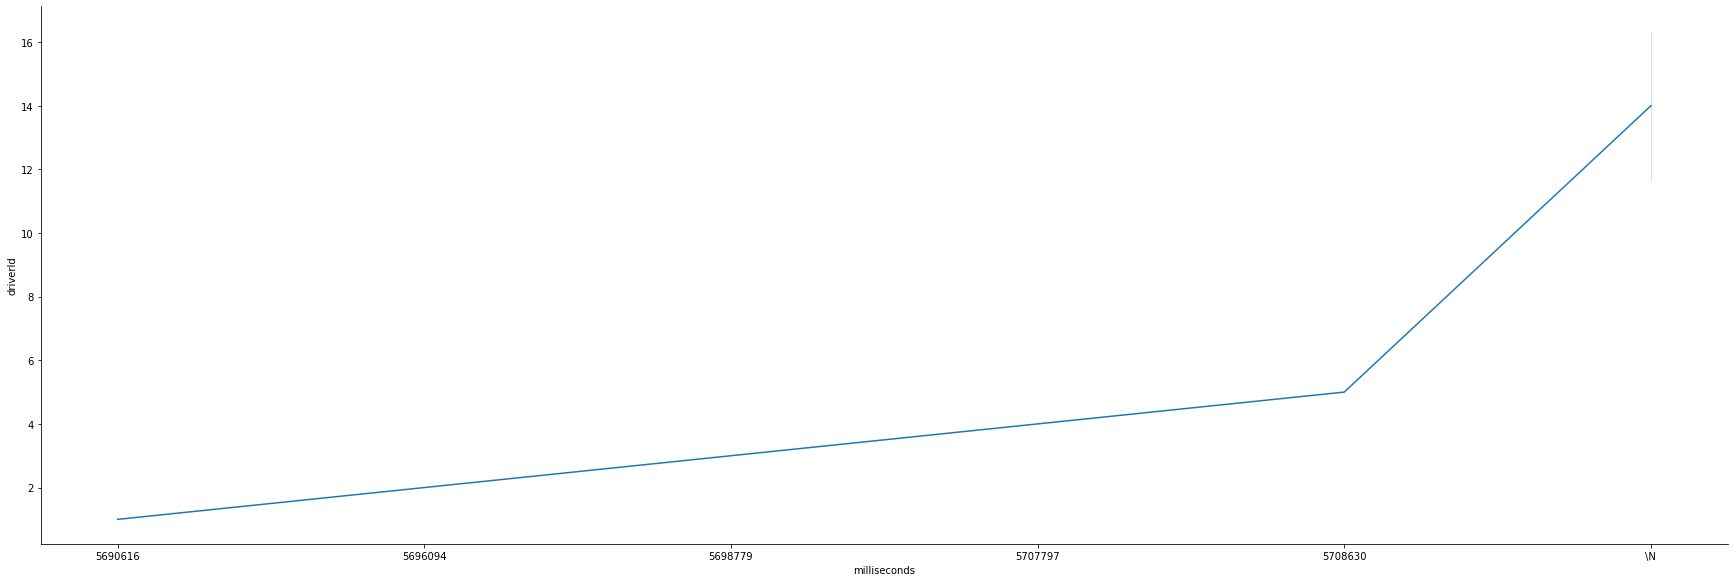

In [178]:
sns.relplot(data=df, x="milliseconds", y="driverId", kind="line", height=8, aspect=3)


In [179]:
#

#### Analyse de la répartition des points

C:\Users\xavir\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='points', ylabel='Density'>

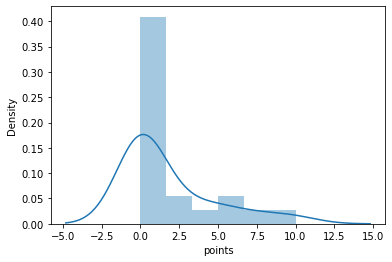

In [198]:
sns.distplot(df.points)

In [ ]:
#

# Données catégoriques

#### Analyse de la distribution de points par constructeurs

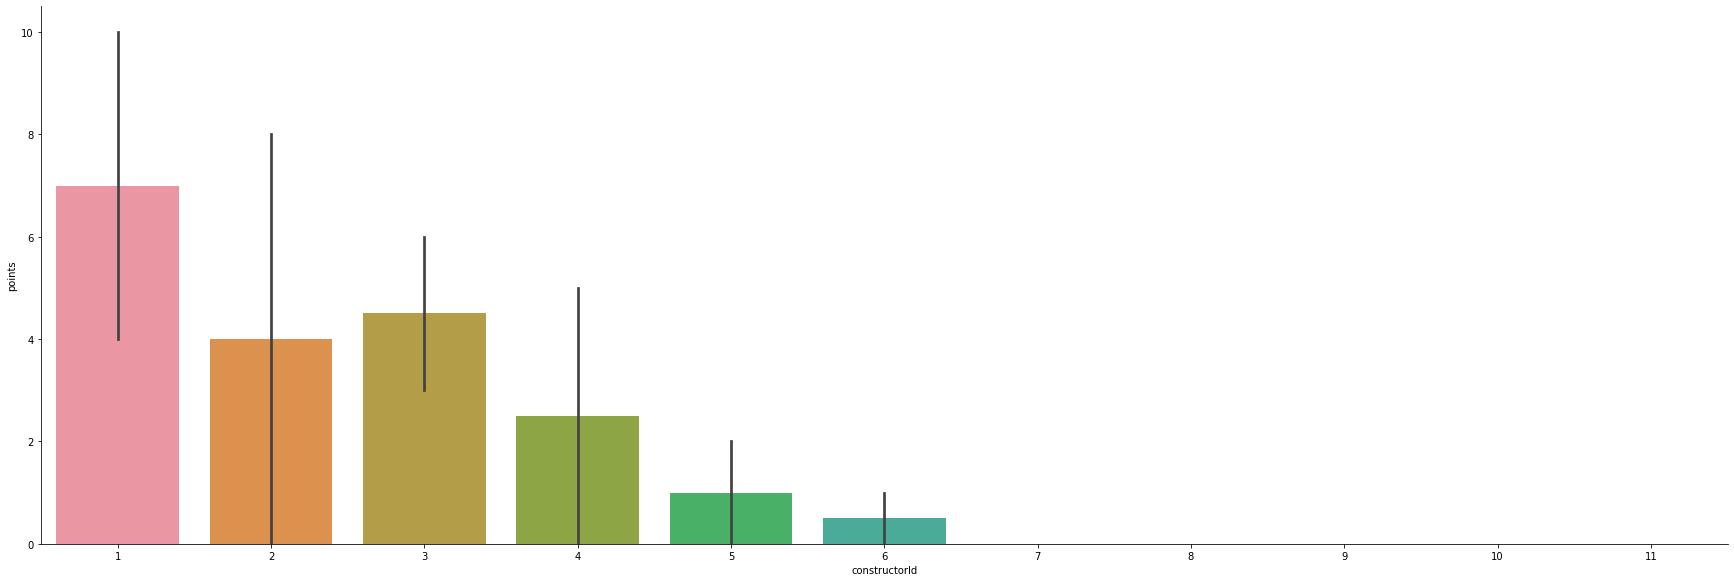

In [133]:
sns.catplot(x="constructorId", y="points", data= df, kind="bar", height=8, aspect=3)

In [ ]:
# 

#### Analyse du nombre total de tours par constructeurs

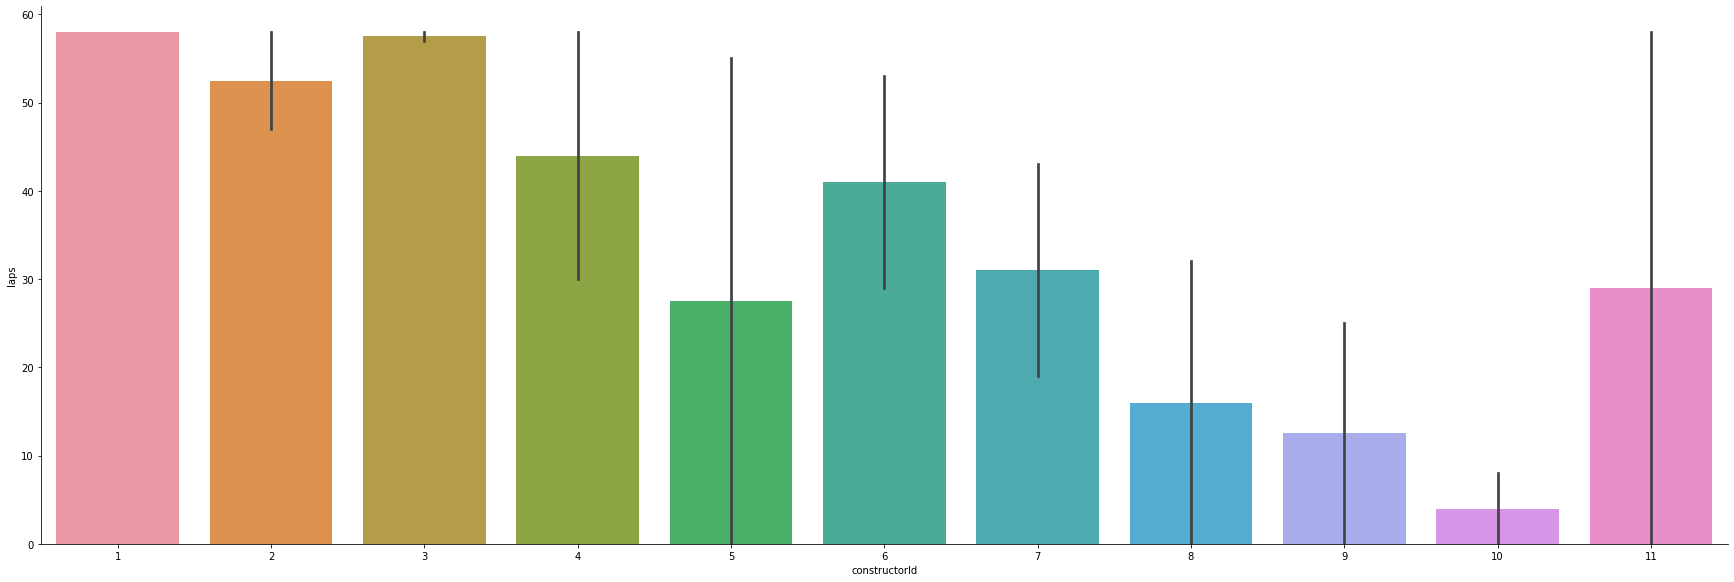

In [134]:
sns.catplot(x="constructorId", y="laps", data= df, kind="bar", height=8, aspect=3)

In [ ]:
#

#### Analyse du temps total des course des constructeurs

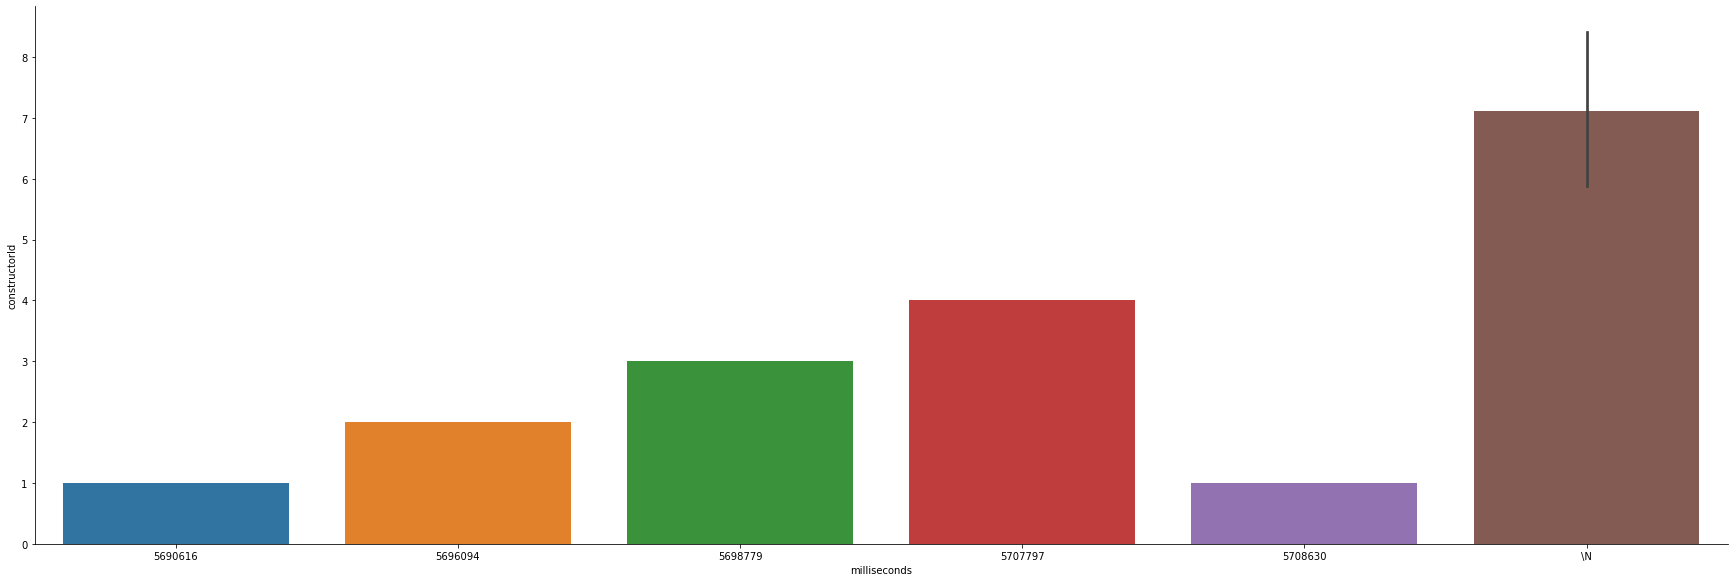

In [135]:
sns.catplot(x="milliseconds", y="constructorId", data= df, kind="bar", height=8, aspect=3)

In [ ]:
#

# Boite à moustache

#### Analyse de la répartition des pilotes par constructeurs

<AxesSubplot:xlabel='constructorId', ylabel='driverId'>

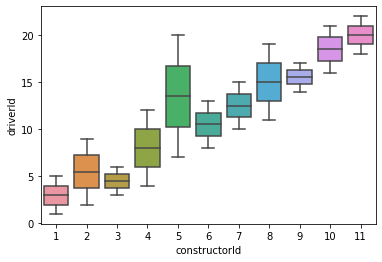

In [142]:
sns.boxplot(x="constructorId", y="driverId", data=df)

In [ ]:
# Il n'y a pas de données abérantes

# Heat map

In [85]:
corr = df.corr()
corr

,raceId,driverId,constructorId,grid,positionOrder,points,laps
raceId,NaN,NaN,NaN,NaN,NaN,NaN,NaN
driverId,NaN,1.000000,0.829231,0.384529,1.000000,-0.799877,-0.795746
constructorId,NaN,0.829231,1.000000,0.534695,0.829231,-0.697285,-0.652336
grid,NaN,0.384529,0.534695,1.000000,0.384529,-0.496688,-0.395248
positionOrder,NaN,1.000000,0.829231,0.384529,1.000000,-0.799877,-0.795746
points,NaN,-0.799877,-0.697285,-0.496688,-0.799877,1.000000,0.623813
laps,NaN,-0.795746,-0.652336,-0.395248,-0.795746,0.623813,1.000000


<AxesSubplot:>

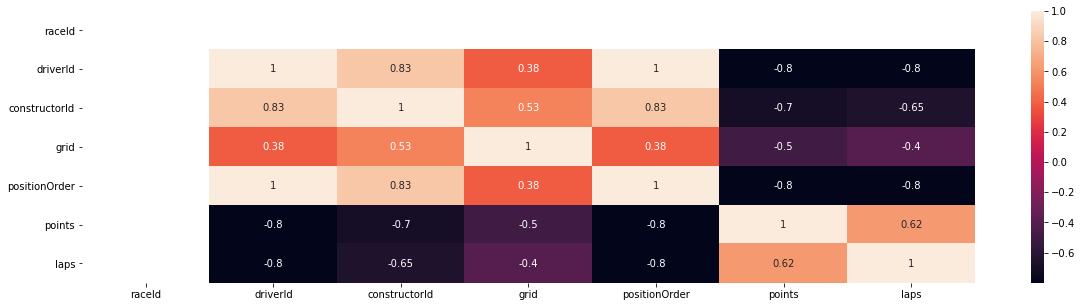

In [86]:
f, ax = plt.subplots(figsize=(20,5))
sns.heatmap(corr, annot=True, ax =ax)
#plt.savefig('heatmapEX1.png')